In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Change working directory
import os
work_dir = '/home/jovyan/PlanetaryComputerExamples/hydroclim'
os.chdir(work_dir)
os.getcwd()

'/home/jovyan/PlanetaryComputerExamples/hydroclim'

In [9]:
file_path = 'kerala_precip.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


In [10]:
df.columns

Index(['Year', 'Unnamed: 1', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'],
      dtype='object')

In [13]:
# Specify the names of the four columns for monsoon 
column1 = 'Jun'
column2 = 'Jul'
column3 = 'Aug'
column4 = 'Sep'


# Create a new column named 'Monsoon' with the sum of the four specified columns
df['Monsoon'] = df[[column1, column2, column3, column4]].sum(axis=1)

# Print the DataFrame to see the new column
print(df.head())

          Year Unnamed: 1   Jan   Feb   Mar    Apr    May     Jun     Jul  \
0  (1971-2020)       NORM   7.4  13.8  34.4  105.5  219.1   648.3   653.5   
1         1901       ACTL  28.7  44.7  51.6  159.9  174.7   824.6   743.0   
2         1902       ACTL   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   
3         1903       ACTL   3.1  18.6   3.1   83.6  249.7   558.6  1022.5   
4         1904       ACTL  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   

     Aug    Sep    Oct    Nov    Dec  Annual  Monsoon  
0  445.2  271.8  306.4  153.1   32.4  2890.9   2018.8  
1  357.5  197.7  266.9  350.8   48.4  3248.5   2122.8  
2  315.8  491.6  358.4  158.3  121.5  3326.5   2403.3  
3  420.2  341.8  354.0  157.0   59.0  3271.1   2343.1  
4  351.8  222.7  328.1   33.9    3.3  3129.6   2398.2  


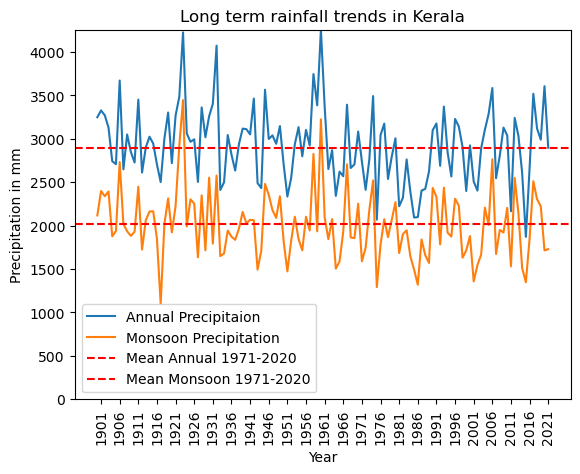

In [14]:
# Assume you want to use column 'x_column' as the x-axis and 'y_column' as the y-axis
x_column = 'Year'
y1_column = 'Annual'
y2_column = 'Monsoon'

annual_mean = df.iloc[1:][y1_column].mean()
monsoon_mean = df.iloc[1:][y2_column].mean()
annual_mean_50 = df[y1_column][0]
monsoon_mean_50 = df[y2_column][0]

# Select data from row 3 to the end
x_values = df[x_column].iloc[1:]
y1_values = df[y1_column].iloc[1:]
y2_values = df[y2_column].iloc[1:]

# Plot the data
plt.plot(x_values, y1_values, label='Annual Precipitaion')
plt.plot(x_values, y2_values - 5, label='Monsoon Precipitation')
plt.axhline(y=annual_mean_50, color='red', linestyle='--', label='Mean Annual 1971-2020')
plt.axhline(y=monsoon_mean_50, color='red', linestyle='--', label='Mean Monsoon 1971-2020')


# Add labels and legend
plt.xlabel('Year')
plt.xticks(x_values.index[::5], x_values.iloc[::5], rotation=90)
# Set the y-axis to start from 0
plt.ylim(0, max(y1_values))

plt.ylabel('Precipitation in mm')
plt.title('Long term rainfall trends in Kerala')
plt.legend()

# Show the plot
plt.show()